# Time Series

## Create a timestamp

In [29]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy_ext as npext

# You can use a datetime object
ts = pd.Timestamp(datetime(2020, 7, 22))
print(ts)

# Or more easily a string
ts = pd.Timestamp("2020-07-22")
print(ts)

2020-07-22 00:00:00
2020-07-22 00:00:00


## Accessing timestamp info

In [30]:
# Some data points are stored as properties:
print("Year:", ts.year)
print("Week:", ts.week)

# While others need to be accessed via methods:
print("Day Name:", ts.day_name())
print("Time:", ts.time())

Year: 2020
Week: 30
Day Name: Wednesday
Time: 00:00:00


## Periods

In [31]:
# Default frequency is "M" (month)
period_monthly = pd.Period("2020-07")
print("Period:", period_monthly)
print("Next Period:", period_monthly + 1)

period_daily = pd.Period("2020-07-01", freq="D")
print("\nPeriod:", period_daily)
print("Next Period:", period_daily + 1)

# Converting frequencies
print("\nMonthly to Daily:", period_monthly.asfreq("D"))

# Converting to a timestamp
print("Period to timestamp:", period_monthly.to_timestamp())

# And can convert timestamps to period:
print("Timestamp to period:", pd.Timestamp("2020-07-22").to_period(freq="D"))

Period: 2020-07
Next Period: 2020-08

Period: 2020-07-01
Next Period: 2020-07-02

Monthly to Daily: 2020-07-31
Period to timestamp: 2020-07-01 00:00:00
Timestamp to period: 2020-07-22


## Date Ranges

In [32]:
# With a specific end date:
specific_end_date = pd.date_range(start="2020-07-01", end="2020-07-31", freq="D")
print(specific_end_date)

number_of_periods = pd.date_range(start="2020-07-01", periods=31, freq="D")
print("\n", number_of_periods)



DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='D')

 DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22

## Converting a string column to datetime and setting as the index

In [33]:
df = pd.DataFrame({
    "date": ["2020-07-21", "2020-07-22", "2020-07-23"],
    "values": [5, 9, 10]
})

df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace=True)
df

,values
date,
2020-07-21,5
2020-07-22,9
2020-07-23,10


## Plotting a time series from a data frame

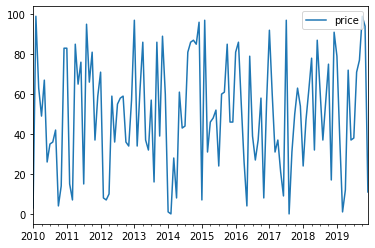

In [34]:
index = pd.date_range(start="2010-01-01", end="2019-12-31", freq="MS")
values = np.random.randint(0, 100, size=len(index))
df = pd.DataFrame(values, columns=["price"], index=index)

df.plot()
plt.show()

## Plotting multiple columns

            price  users
2010-01-01      3      2
2010-02-01     99      3
2010-03-01     63      1
2010-04-01     49      4
2010-05-01     67      4


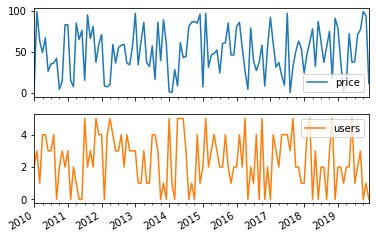

In [35]:
df["users"] = np.random.randint(0, 6, size=len(index))
print(df.head())

# subplots will cause pyplot to show one chart per column
df.plot(subplots=True)
plt.show()

## Slicing a time series data frame

In [36]:
print(df.head())

# Slice to get all values in a year
print("\nRows in 2018:", len(df['2018']))

# Can also give it a range - note that the second value is inclusive
print("Rows in 2018 - 2019:", len(df['2018':'2019']))

# Or slice by month
print("Rows in Jan 2018 - March 2019:", len(df['2018-01-01':'2019-03-01']))

# And of course using loc to grab a specific value
print("Price on a specific day", df.loc["2010-01-01", "price"])

            price  users
2010-01-01      3      2
2010-02-01     99      3
2010-03-01     63      1
2010-04-01     49      4
2010-05-01     67      4

Rows in 2018: 12
Rows in 2018 - 2019: 24
Rows in Jan 2018 - March 2019: 15
Price on a specific day 3


## Changing the frequency of a time series

In [37]:
# Upsampling because new frequency is higher than original frequency:
daily = df.asfreq("D")

print("Upsampling:\n", daily.head())

Upsampling:
             price  users
2010-01-01    3.0    2.0
2010-01-02    NaN    NaN
2010-01-03    NaN    NaN
2010-01-04    NaN    NaN
2010-01-05    NaN    NaN


## Shifting and lagging

In [38]:
index = pd.date_range(start="2010-01-01", end="2019-12-31", freq="MS")
values = np.random.randint(0, 100, size=len(index))
df = pd.DataFrame(values, columns=["price"], index=index)

print("Original:\n")
print(df.head())

print("\nShifted, lagged, and % change:\n")
df["shifted"] = df["price"].shift()
df["lagged"] = df["price"].shift(periods=-1)
df["change"] = df["price"].diff()
df["percent_change_1"] = df["price"].div(df["shifted"]).sub(1).mul(100)
df["percent_change_2"] = df["price"].pct_change().mul(100)
print(df.head())

Original:

            price
2010-01-01     81
2010-02-01     93
2010-03-01     71
2010-04-01      4
2010-05-01     58

Shifted, lagged, and % change:

            price  shifted  lagged  change  percent_change_1  percent_change_2
2010-01-01     81      NaN    93.0     NaN               NaN               NaN
2010-02-01     93     81.0    71.0    12.0         14.814815         14.814815
2010-03-01     71     93.0     4.0   -22.0        -23.655914        -23.655914
2010-04-01      4     71.0    58.0   -67.0        -94.366197        -94.366197
2010-05-01     58      4.0    17.0    54.0       1350.000000       1350.000000


## Forward and Backfill

In [39]:
index = pd.date_range(start="2010-01-01", end="2010-01-31", freq="W")
values = np.random.randint(0, 100, size=len(index))
df_weekly = pd.DataFrame(values, columns=["price"], index=index)

print("Weekly:\n", df_weekly)

df_daily = df_weekly.asfreq("D")
df_daily_ffill = df_weekly.asfreq("D", method="ffill")
df_daily_bfill = df_weekly.asfreq("D", method="bfill")
df_daily_zero = df_weekly.asfreq("D", fill_value=0)

combined = pd.concat([df_daily, df_daily_ffill, df_daily_bfill, df_daily_zero], axis=1)
combined.columns = ["default", "ffill", "bfill", "zero"]
print("\nDaily:\n", combined)

Weekly:
             price
2010-01-03     31
2010-01-10     55
2010-01-17     16
2010-01-24     38
2010-01-31     57

Daily:
             default  ffill  bfill  zero
2010-01-03     31.0     31     31    31
2010-01-04      NaN     31     55     0
2010-01-05      NaN     31     55     0
2010-01-06      NaN     31     55     0
2010-01-07      NaN     31     55     0
2010-01-08      NaN     31     55     0
2010-01-09      NaN     31     55     0
2010-01-10     55.0     55     55    55
2010-01-11      NaN     55     16     0
2010-01-12      NaN     55     16     0
2010-01-13      NaN     55     16     0
2010-01-14      NaN     55     16     0
2010-01-15      NaN     55     16     0
2010-01-16      NaN     55     16     0
2010-01-17     16.0     16     16    16
2010-01-18      NaN     16     38     0
2010-01-19      NaN     16     38     0
2010-01-20      NaN     16     38     0
2010-01-21      NaN     16     38     0
2010-01-22      NaN     16     38     0
2010-01-23      NaN     16     38 

## Upsampling with resampling and reindexing

In [40]:
index = pd.date_range(start="2010-01-01", periods=4, freq="QS")
quarterly = pd.DataFrame([10, 20, 30, 40], columns=["price"], index=index)
print("Original:\n", quarterly)

# Resampling
print("\nForward fill:\n", quarterly.resample("MS").ffill().add_suffix("_ffill"))
print("\nBack fill:\n", quarterly.resample("MS").bfill().add_suffix("_bfill"))
print("\nInterpolate:\n", quarterly.resample("MS").interpolate().add_suffix("_interpolate"))

# Reindexing
monthly_dates = pd.date_range(start=quarterly.index.min(), end=quarterly.index.max(), freq="MS")
monthly = quarterly.reindex(monthly_dates)
print("\nReindexed:\n", monthly)
print("\nReindexed forward filled:\n", monthly.ffill())
print("\nReindexed back filled:\n", monthly.bfill())
print("\nReindexed interpolated:\n", monthly.interpolate())


Original:
             price
2010-01-01     10
2010-04-01     20
2010-07-01     30
2010-10-01     40

Forward fill:
             price_ffill
2010-01-01           10
2010-02-01           10
2010-03-01           10
2010-04-01           20
2010-05-01           20
2010-06-01           20
2010-07-01           30
2010-08-01           30
2010-09-01           30
2010-10-01           40

Back fill:
             price_bfill
2010-01-01           10
2010-02-01           20
2010-03-01           20
2010-04-01           20
2010-05-01           30
2010-06-01           30
2010-07-01           30
2010-08-01           40
2010-09-01           40
2010-10-01           40

Interpolate:
             price_interpolate
2010-01-01          10.000000
2010-02-01          13.333333
2010-03-01          16.666667
2010-04-01          20.000000
2010-05-01          23.333333
2010-06-01          26.666667
2010-07-01          30.000000
2010-08-01          33.333333
2010-09-01          36.666667
2010-10-01          40.0000

## Upsampling with resampling

Original:
                  price
2010-01-01  105.760342
2010-04-01  105.470327
2010-07-01  101.285692
2010-10-01   93.737199
2011-01-01   99.067561

Yearly Total:
                  price
2010-01-01  406.253560
2011-01-01  412.188495
2012-01-01  384.261394
2013-01-01  383.374547
2014-01-01  395.804996

Yearly Mean:
                  price
2010-01-01  101.563390
2011-01-01  103.047124
2012-01-01   96.065348
2013-01-01   95.843637
2014-01-01   98.951249

Yearly First:
                  price
2010-01-01  105.760342
2011-01-01   99.067561
2012-01-01   90.288714
2013-01-01   86.691613
2014-01-01   99.418390

Yearly Last:
                  price
2010-01-01   93.737199
2011-01-01  104.076291
2012-01-01   85.726936
2013-01-01   97.389707
2014-01-01   97.697832


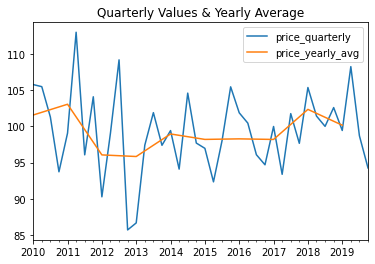

In [41]:
index = pd.date_range(start="2010-01-01", periods=40, freq="QS")
values = np.random.normal(loc=100, scale=5, size=len(index))
quarterly = pd.DataFrame(values, columns=["price"], index=index)
print("Original:\n", quarterly.head())

print("\nYearly Total:\n", quarterly.resample("YS").sum().head())
print("\nYearly Mean:\n", quarterly.resample("YS").mean().head())
print("\nYearly First:\n", quarterly.resample("YS").first().head())
print("\nYearly Last:\n", quarterly.resample("YS").last().head())

ax = quarterly.add_suffix("_quarterly").plot()
quarterly.resample("YS").mean().add_suffix("_yearly_avg").plot(ax=ax, title="Quarterly Values & Yearly Average")
plt.show()

## Rolling Windows

In [42]:
index = pd.date_range(start="2020-07-01", end="2020-07-31", freq="2D")
every_two_days = pd.DataFrame({
    "date": index,
    "price": range(1, len(index) + 1)
})
every_two_days.set_index("date", inplace=True)

print("Original:\n", every_two_days)

print("\nMean Last 2 Rows (including this date):\n", every_two_days.rolling(window=2).mean())
print("\nMean Last 2 Days (including this date):\n", every_two_days.rolling(window="2D").mean())

Original:
             price
date             
2020-07-01      1
2020-07-03      2
2020-07-05      3
2020-07-07      4
2020-07-09      5
2020-07-11      6
2020-07-13      7
2020-07-15      8
2020-07-17      9
2020-07-19     10
2020-07-21     11
2020-07-23     12
2020-07-25     13
2020-07-27     14
2020-07-29     15
2020-07-31     16

Mean Last 2 Rows (including this date):
             price
date             
2020-07-01    NaN
2020-07-03    1.5
2020-07-05    2.5
2020-07-07    3.5
2020-07-09    4.5
2020-07-11    5.5
2020-07-13    6.5
2020-07-15    7.5
2020-07-17    8.5
2020-07-19    9.5
2020-07-21   10.5
2020-07-23   11.5
2020-07-25   12.5
2020-07-27   13.5
2020-07-29   14.5
2020-07-31   15.5

Mean Last 2 Days (including this date):
             price
date             
2020-07-01    1.0
2020-07-03    2.0
2020-07-05    3.0
2020-07-07    4.0
2020-07-09    5.0
2020-07-11    6.0
2020-07-13    7.0
2020-07-15    8.0
2020-07-17    9.0
2020-07-19   10.0
2020-07-21   11.0
2020-07-23   12.0
2020-

## Expanding Windows

In [43]:
df = pd.DataFrame({
    "price": range(1, 6)
})
df["cumsum"] = df["price"].cumsum()
df

,price,cumsum
0,1,1
1,2,3
2,3,6
3,4,10
4,5,15


## Plotting a time series

In [44]:
house_prices = pd.read_csv("data/house-prices.csv")
house_prices["DateSold"] = house_prices.apply(lambda row: datetime(row["YrSold"], row["MoSold"], 1), axis=1)

df_timeseries = house_prices[["DateSold", "SalePrice"]]
df_timeseries.head()

,DateSold,SalePrice
0,2008-02-01,208500
1,2007-05-01,181500
2,2008-09-01,223500
3,2006-02-01,140000
4,2008-12-01,250000


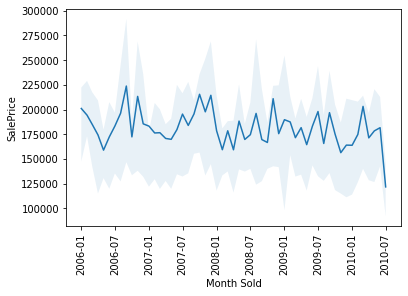

In [45]:
ax = sns.lineplot(x="DateSold", y="SalePrice", data=df_timeseries,ci=None)
bounds = df_timeseries.groupby('DateSold')['SalePrice'].quantile((0.25,0.75)).unstack()
ax.fill_between(x=bounds.index, y1=bounds.iloc[:,0], y2=bounds.iloc[:,1], alpha=0.1)
plt.xticks(rotation=90)
plt.xlabel("Month Sold")
plt.show()


## Rolling with criteria

In [47]:
index = pd.date_range(start="2020-07-01", end="2020-07-31")
df = pd.DataFrame({
    "date": index,
    "price": range(1, len(index) + 1)
})
df["dow"] = df["date"].apply(lambda x: x.strftime("%A"))
df["is_weekend"] = df["date"].apply(lambda x: x.weekday() >= 5)

def recent_avg_weekday_price(price, is_weekend):
    return np.nanmean(np.where(is_weekend[:-1], np.nan, price[:-1]))

def recent_avg_weekend_price(price, is_weekend):
    return np.nanmean(np.where(is_weekend[:-1], price[:-1], np.nan))

df["recent_avg_weekday_price"] = npext.rolling_apply(recent_avg_weekday_price, 8, df["price"].values, df["is_weekend"].values)
df["recent_avg_weekend_price"] = npext.rolling_apply(recent_avg_weekend_price, 8, df["price"].values, df["is_weekend"].values)


df.set_index("date", inplace=True)

display(df)




,price,dow,is_weekend,recent_avg_weekday_price,recent_avg_weekend_price
date,,,,,
2020-07-01,1,Wednesday,False,NaN,NaN
2020-07-02,2,Thursday,False,NaN,NaN
2020-07-03,3,Friday,False,NaN,NaN
2020-07-04,4,Saturday,True,NaN,NaN
2020-07-05,5,Sunday,True,NaN,NaN
2020-07-06,6,Monday,False,NaN,NaN
2020-07-07,7,Tuesday,False,NaN,NaN
2020-07-08,8,Wednesday,False,3.8,4.5
2020-07-09,9,Thursday,False,5.2,4.5
